# All of need 👇

In [ ]:
#!pip install nltk

In [ ]:
#!pip install langdetect

In [ ]:
#!pip install stop_words

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from textblob import TextBlob
#her kelime pozitif veya negatif bir değer alır

#Dil tespit etmek için
from langdetect import detect

#Sentiment analiz yapmak için
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

#Bulut resmi için
import os
from PIL import Image

#NLP
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
from stop_words import get_stop_words
import re
#WordCloud
from wordcloud import WordCloud,STOPWORDS

#Machine learning
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score


from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,classification_report

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Hi Amazon Data! ✌

In [5]:
url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
df = pd.read_json(url, compression='gzip', lines=True)

In [6]:
df.to_csv("amazon.csv")

In [ ]:
#from google.colab import files
#files.download("amazon.csv")

In [7]:
df = pd.read_csv("amazon.csv")

In [9]:
df=df.sample(40000)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1607656 to 1129066
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      40000 non-null  int64 
 1   reviewerID      40000 non-null  object
 2   asin            40000 non-null  object
 3   reviewerName    39406 non-null  object
 4   helpful         40000 non-null  object
 5   reviewText      39977 non-null  object
 6   overall         40000 non-null  int64 
 7   summary         40000 non-null  object
 8   unixReviewTime  40000 non-null  int64 
 9   reviewTime      40000 non-null  object
dtypes: int64(3), object(7)
memory usage: 3.4+ MB


In [11]:
from datetime import datetime
df.reviewTime=pd.to_datetime(df.reviewTime)

In [12]:
df.reviewTime.head()

1607656   2014-05-30
513965    2013-07-01
1641408   2013-11-07
357646    2009-08-02
891233    2013-04-03
Name: reviewTime, dtype: datetime64[ns]

In [13]:
df.drop(["Unnamed: 0","reviewerID","asin","unixReviewTime","reviewerName"],axis=1,inplace=True)

In [14]:
df.overall.unique()

array([5, 1, 4, 2, 3])

In [15]:
df["reviewText"].iloc[0]

"I've had excellent performance out of my Anker Astro E5, my first step to testing was of course to top it off, then run it to zero by seeing how many times I could charge my HTC One (m7), and after 4 and a half charges I was quite satisfied, and it now is now a permanent resident of my laptop bag and goes with me wherever I go.Very satisfied, especially for the price."

In [16]:
df=df.rename(columns = {"reviewText":'text'})


In [17]:
df.sample()

,helpful,text,overall,summary,reviewTime
1587773,"[0, 0]",Im not a gamer but i like a big mouse so i use...,5,my favorite mouse ever,2014-03-25


# NLP Steps

In [18]:
df['text'].replace({'r"\&\#[0-9]+\;"':''},regex=True,inplace=True)
#HTML karakterlerini kaldırdık
df['text']=df['text'].str.lower()
#Hepsini küçük harflere çevirdik
df['text'].replace({'[^\w\s]':''},regex=True,inplace=True)
#Noktalama işartelerini kaldırdık
df['text'].replace({'\d+':''},regex=True,inplace=True)
#Rakamları kaldırdık
df['text'].replace({'\n':'','\r':'',"\'":""},regex=True,inplace=True)
#Satır sonu işaretleri kaldırılır
df['text'].replace({'r"[\s]+"':''},regex=True,inplace=True)
#Gereksiz boşlukları(whitespaces) kaldırdık
from unicodedata import normalize
df['text']=df['text'].apply(lambda text: normalize("NFKD", str(text)).encode("ascii", "ignore").decode("utf-8", "ignore"))
#Aksanları ortadan kaldırdık

In [19]:
df.sample()

,helpful,text,overall,summary,reviewTime
404075,"[0, 0]",i bought this to supplement transferring photo...,4,works great!! hinge is very fragile however..,2010-07-15


In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
df['text']=df['text'].apply(lambda x:" ".join([i for i in str(x).split(" ")  if i not in stop_words]))
#Gereksiz kelimeleri kaldırdık

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
#!pip install langdetect

In [22]:
#df['language']=df['text'].apply(detect)
#df=df[df['language']=='en']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 1607656 to 1129066
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   helpful     40000 non-null  object        
 1   text        40000 non-null  object        
 2   overall     40000 non-null  int64         
 3   summary     40000 non-null  object        
 4   reviewTime  40000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.8+ MB


In [24]:
df.text.head(100)

1607656    ive excellent performance anker astro e first ...
513965     dont know sucked didnt work speakers thanks no...
1641408    sabrent  port usb hub great addition computer ...
357646     transcend  gb sdhc class  flash memory card ca...
891233     product received clearly opened tape used rese...
                                 ...                        
1002655    works great price tried card nikon tried take ...
1370130    setup securifi almond router took  minutes  to...
1152489    already owned st gen apple tv gb well jailbrok...
929279     purchased discontinued video recorder  problem...
1641676    camera good buy easy use even beginner like ta...
Name: text, Length: 100, dtype: object

In [25]:
df.isnull().value_counts()

helpful  text   overall  summary  reviewTime
False    False  False    False    False         40000
dtype: int64

In [26]:
df.dropna(axis=0,inplace=True)

In [27]:
df.shape  # 1 null varmış, silindi.

(40000, 5)

In [28]:
from textblob import TextBlob
df[['polarity','subjectivity']]=df['text'].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [29]:
df.sample(5)

,helpful,text,overall,summary,reviewTime,polarity,subjectivity
919841,"[5, 5]",first let say biggest mistake buying amazoncom...,1,Arrived Defective,2011-08-27,-0.078205,0.352564
638982,"[0, 0]",used cable transfer files docs pixs xp desk to...,5,Awesome Cable,2010-12-02,0.190000,0.410000
406842,"[0, 0]",inexpensive soft box canon ex ii works ok fit ...,4,Soft box for Flash,2012-03-12,0.376190,0.503571
1206617,"[6, 8]",love little ihome speakers work really good im...,5,Obsessed with these little speakers!,2012-05-16,0.171807,0.522101
680072,"[1, 1]",many backpacks hold laptop pack plenty spa...,4,Quality for the money,2010-05-10,0.221429,0.635714


In [30]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(i) for i in df['text'].values]

In [31]:
df.sample(5)

,helpful,text,overall,summary,reviewTime,polarity,subjectivity,tokenized
1252055,"[3, 4]",works thats needed know bought extremly satisf...,4,Great product for the cash!,2012-08-10,0.180556,0.505556,"[works, thats, needed, know, bought, extremly,..."
713581,"[3, 4]",little thing really plays music well got plug...,5,I really like it!,2011-01-10,0.054167,0.457143,"[little, thing, really, plays, music, well, go..."
1205396,"[0, 0]",space saving utilitarian nobrainer idea one d...,4,"A good product for the road, at a price",2014-01-11,0.237500,0.463393,"[space, saving, utilitarian, nobrainer, idea, ..."
231690,"[1, 2]",trying resolve receiving wrong cable company t...,1,Recieved wrong cable,2011-01-13,-0.112500,0.662500,"[trying, resolve, receiving, wrong, cable, com..."
573303,"[0, 0]",freezes every annoying otherwise works finei w...,2,"Compact and works, most of the time...",2013-05-09,-0.800000,0.900000,"[freezes, every, annoying, otherwise, works, f..."


In [32]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
df['lemmatize']=[[lemmatizer.lemmatize(str(i)) for i in words] for words in df['text'].values]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [33]:
df.head()

,helpful,text,overall,summary,reviewTime,polarity,subjectivity,tokenized,lemmatize
1607656,"[0, 0]",ive excellent performance anker astro e first ...,5,Excellent portable power,2014-05-30,0.385417,0.687500,"[ive, excellent, performance, anker, astro, e,...","[i, v, e, , e, x, c, e, l, l, e, n, t, , p, ..."
513965,"[0, 1]",dont know sucked didnt work speakers thanks no...,1,couldn't even figure out how to hang up,2013-07-01,0.200000,0.200000,"[dont, know, sucked, didnt, work, speakers, th...","[d, o, n, t, , k, n, o, w, , s, u, c, k, e, ..."
1641408,"[0, 0]",sabrent port usb hub great addition computer ...,4,Works great and looks great!,2013-11-07,0.237353,0.609706,"[sabrent, port, usb, hub, great, addition, com...","[s, a, b, r, e, n, t, , , p, o, r, t, , u, ..."
357646,"[0, 0]",transcend gb sdhc class flash memory card ca...,5,Memory Card with Card Reader,2009-08-02,0.616667,0.791667,"[transcend, gb, sdhc, class, flash, memory, ca...","[t, r, a, n, s, c, e, n, d, , , g, b, , s, ..."
891233,"[0, 0]",product received clearly opened tape used rese...,4,Good device - but sent a used unit.,2013-04-03,0.212121,0.512626,"[product, received, clearly, opened, tape, use...","[p, r, o, d, u, c, t, , r, e, c, e, i, v, e, ..."


# Balancing Data

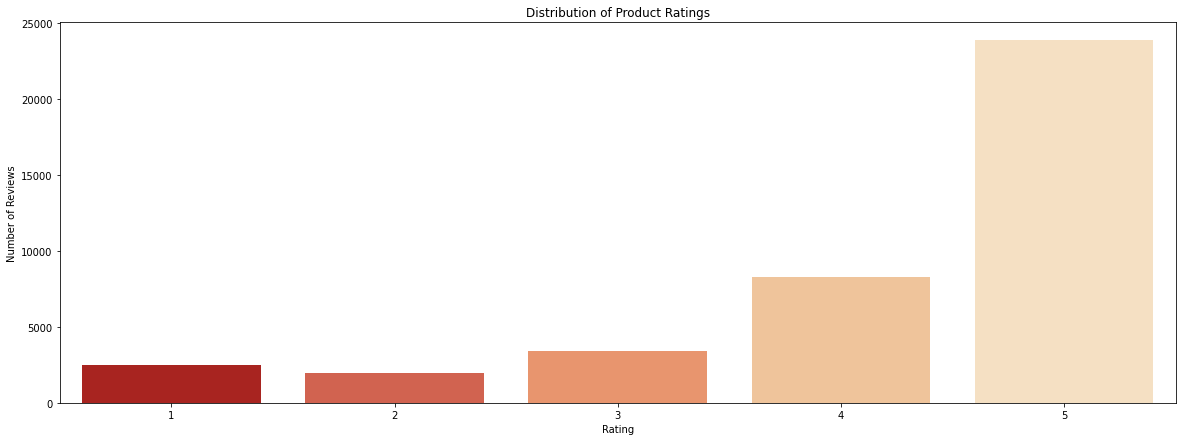

In [35]:
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["overall"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [36]:
df=df.rename(columns = {"overall":'label'})


In [37]:
#trim the majority class
condition = df["label"] == 5
count = len(df[df["label"] == 2])
trimmed_df =df[condition].sample(n=count, random_state=42)

#trim other class and add on to the trimmed_df
for rating in [1, 2, 3, 4]:
    condition = df["label"] == rating
    if len(df[condition]) >= count:
        add_df = df[condition].sample(n=count, random_state=42)
    else:
        add_df = df[condition]
    trimmed_df = pd.concat([trimmed_df, add_df], ignore_index=False)

#display new class sizes of trimmed_df
for rating in [1, 2, 3, 4, 5]:
    class_size = len(trimmed_df[trimmed_df["label"] == rating])
    print(f"Size of Class {rating}: {class_size}")

Size of Class 1: 1943
Size of Class 2: 1943
Size of Class 3: 1943
Size of Class 4: 1943
Size of Class 5: 1943


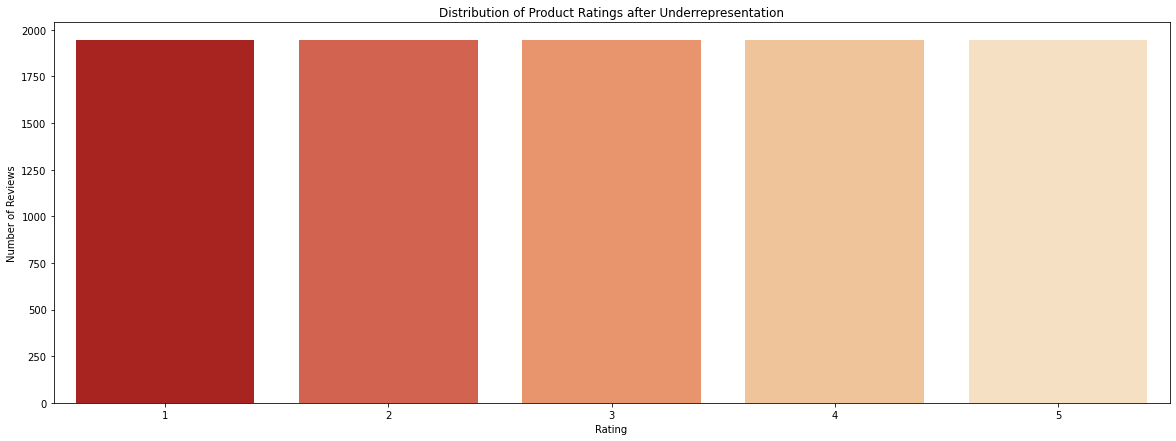

In [38]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=trimmed_df["label"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings after Underrepresentation", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

# Train-Test / Vectorizer-Ngram-Model

In [40]:
x=df.text
y=df.label

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
tf2=TfidfVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
x_train_tf2=tf2.fit_transform(x_train)
x_test_tf2=tf2.transform(x_test)

In [42]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

tf2_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
tf2=pd.DataFrame(columns=tf2_col)

for i in classifiers:
    pred_tf2=i.fit(x_train_tf2,y_train).predict(x_test_tf2)
    name = i.__class__.__name__
    
    accuracy=accuracy_score(y_test,pred_tf2)
    precision=precision_score(y_test,pred_tf2,average='weighted')
    f1=f1_score(y_test,pred_tf2,average='weighted')
    recall=recall_score(y_test,pred_tf2,average='weighted')

    tf2_entry=pd.DataFrame([[name,'T-IDF/N-gram',accuracy*100,precision*100,f1*100,recall*100]],columns=tf2_col)
    tf2=tf2.append(tf2_entry)

tf2

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,T-IDF/N-gram,63.558333,56.628763,56.403542,63.558333
0,KNeighborsClassifier,T-IDF/N-gram,54.650000,46.991005,49.291018,54.650000
0,DecisionTreeClassifier,T-IDF/N-gram,50.800000,49.885411,50.322625,50.800000
0,RandomForestClassifier,T-IDF/N-gram,59.866667,50.527167,45.188163,59.866667
0,AdaBoostClassifier,T-IDF/N-gram,62.041667,54.130431,53.722750,62.041667
0,GradientBoostingClassifier,T-IDF/N-gram,62.766667,55.723124,54.316070,62.766667
0,MultinomialNB,T-IDF/N-gram,59.616667,35.541469,44.533532,59.616667
0,BernoulliNB,T-IDF/N-gram,59.441667,42.670725,45.864393,59.441667


In [43]:
tf1=TfidfVectorizer(stop_words='english')
x_train_tf1=tf1.fit_transform(x_train)
x_test_tf1=tf1.transform(x_test)

tf2=TfidfVectorizer(ngram_range=(1,2),stop_words='english',binary=True)
x_train_tf2=tf2.fit_transform(x_train)
x_test_tf2=tf2.transform(x_test)

In [44]:
classifiers=[
    LogisticRegression(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MultinomialNB(),
    BernoulliNB()
]

tf1_col=['Classifier','Methods','Accuracy','Precision','F1','Recall']
tf1=pd.DataFrame(columns=tf1_col)

for i in classifiers:
    pred_tf1=i.fit(x_train_tf1,y_train).predict(x_test_tf1)
    name = i.__class__.__name__
    
    accuracy=accuracy_score(y_test,pred_tf1)
    precision=precision_score(y_test,pred_tf1,average='weighted')
    f1=f1_score(y_test,pred_tf1,average='weighted')
    recall=recall_score(y_test,pred_tf1,average='weighted')

    tf1_entry=pd.DataFrame([[name,'T-IDF',accuracy*100,precision*100,f1*100,recall*100]],columns=tf1_col)
    tf1=tf1.append(tf1_entry)

tf1

,Classifier,Methods,Accuracy,Precision,F1,Recall
0,LogisticRegression,T-IDF,64.025000,57.193810,58.193962,64.025000
0,KNeighborsClassifier,T-IDF,50.133333,45.881072,47.353411,50.133333
0,DecisionTreeClassifier,T-IDF,52.116667,49.859194,50.894981,52.116667
0,RandomForestClassifier,T-IDF,60.025000,48.403423,45.963995,60.025000
0,AdaBoostClassifier,T-IDF,61.916667,54.146607,53.462737,61.916667
0,GradientBoostingClassifier,T-IDF,62.316667,55.349974,53.069392,62.316667
0,MultinomialNB,T-IDF,59.616667,35.541469,44.533532,59.616667
0,BernoulliNB,T-IDF,57.191667,50.903583,49.174362,57.191667


In [ ]:
# The best result is LogisticRegression	T-IDF	64.025000

# WordCloud

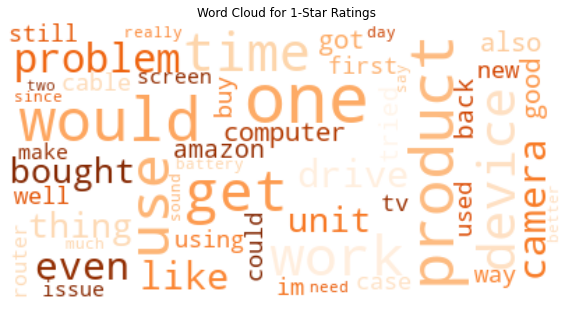

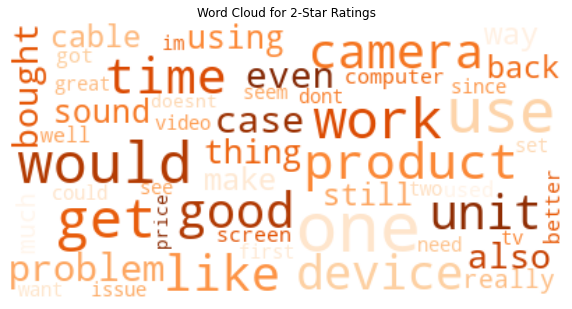

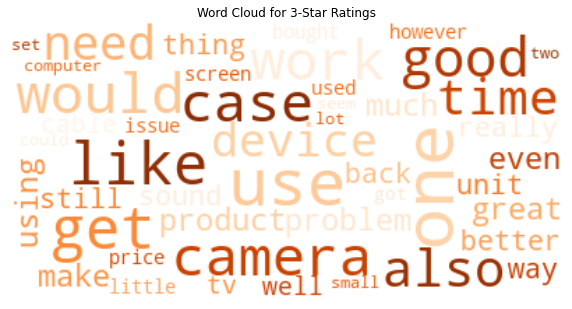

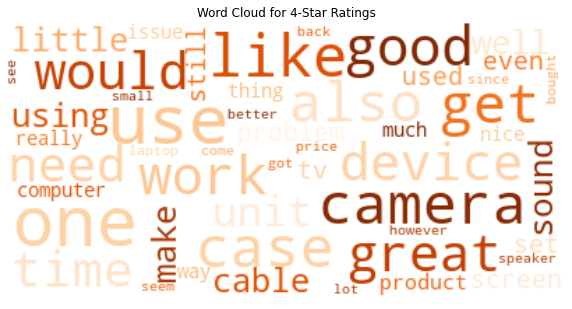

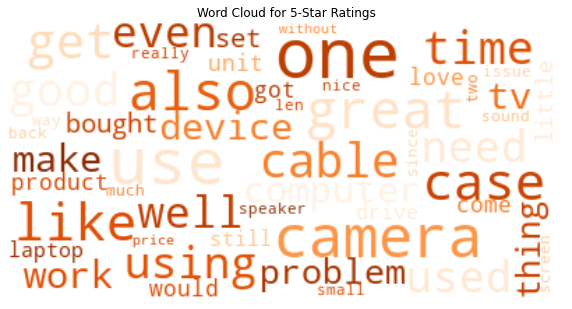

In [46]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(df[df["label"]==1]["text"].values).lower()
two_star_text = " ".join(df[df["label"]==2]["text"].values).lower()
three_star_text = " ".join(df[df["label"]==3]["text"].values).lower()
four_star_text = " ".join(df[df["label"]==4]["text"].values).lower()
five_star_text = " ".join(df[df["label"]==5]["text"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()

# What is named entity recognition (NER) and how can I use it?


1.   An entity can be any word or series of words that consistently refers to the same thing. Every detected entity is classified into a predetermined category. For example, an NER machine learning (ML) model might detect the word “super.AI” in a text and classify it as a “Company”.

2.   At the heart of any NER model is a two step process:

**Detect a named entity**:

Detects a word or string of words that form an entity. Each word represents a token: “The Great Lakes” is a string of three tokens that represents one entity.

Categorize the entity:

The creation of entity categories.You can create your own entity categories or there are programs doing this automatically.

3. Libraries 
**NLTK** for tokenizing

**SpaCy** for entities recognition.


